In [1]:
import os
import glob
import h5py
import netCDF4
import numpy as np
from operator import sub
from scipy import signal
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

C:\Users\lachl\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lachl\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\lachl\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ImportError: DLL load failed while importing _netCDF4: The specified procedure could not be found.

In [10]:
##### Load Mean Wave Height Scenarios #########################

# Present Day
nc_data = netCDF4.Dataset('nex_m.nc')

#Scenario RCP 2.5
nc_data2 = netCDF4.Dataset('nex_2.5_m.nc')

#Scenario RCP 8.5
nc_data8 = netCDF4.Dataset('nex_8.5_m.nc')

#Scenario TD
nc_dataTD = netCDF4.Dataset('nex_TD_m.nc')


##### STORM SCENARIOS ##########################################

# Present Day
nc_dataS = netCDF4.Dataset('ne1_S.nc')

#Scenario RCP 2.5
nc_data2S = netCDF4.Dataset('nex1_2.5_S.nc')

#Scenario RCP 8.5
nc_data8S = netCDF4.Dataset('ne1_8.5_S.nc')

#Scenario TD
nc_dataTDS = netCDF4.Dataset('nex1_TD_S.nc')


#### Cyclone Scenarios ###########################################

# Present Day
#nc_datac1 = netCDF4.Dataset('ex1_C1.nc')

#Scenario RCP 2.5
#nc_datac2 = netCDF4.Dataset('ex1_C2.nc')

In [11]:
maxy = nc_data.variables['zb'][:,:,:].shape[2]
print maxy

1123


In [12]:
xp = 1123-360

#Select which model to plot:

top1 = nc_data.variables['zs'][:,:,xp]
top2 = nc_data2.variables['zs'][:,:,xp] +0.27
top3 = nc_data8.variables['zs'][:,:,xp] +0.98
top4 = nc_dataTD.variables['zs'][:,:,xp] +2.34

top1S= nc_dataS.variables['zs'][:,:,xp]
top2S= nc_data2S.variables['zs'][:,:,xp]+0.27
top3S= nc_data8S.variables['zs'][:,:,xp]+0.98
top4S= nc_dataTDS.variables['zs'][:,:,xp]+2.34


zbx1 = nc_data.variables['zb'][1,:,xp]

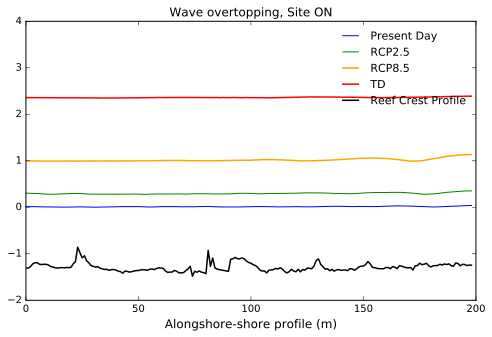

In [18]:
zbx1 = nc_data.variables['zb'][1,:,xp]


def plot_topping_profile(top1, top2, zbx1):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)
    #ax2 = ax1.twinx()
    
    ax1.plot(np.amax(top1,axis=0), 'blue', label='Present Day', linewidth=1)
    ax1.plot(np.amax(top2,axis=0), 'green', label='RCP2.5', linewidth=1)
    ax1.plot(np.amax(top3,axis=0), 'orange', label='RCP8.5', linewidth=1.5)
    ax1.plot(np.amax(top4,axis=0), 'red', label='TD', linewidth=1.5)

    #ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day (Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5(Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5(Storm)', linewidth=1.5)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top4S,axis=0), 'red', label='TD (Storm)', linewidth=1.5)#, linestyle = 'dashed')
    
    #ax2.set_ylabel('x-Direction Velocity (m/s)', size=12)
    #ax2.yaxis.label.set_color('black')
    #ax2.tick_params(axis='y', labelsize=11)
    
   
    
    ax1.plot(zbx1, 'black', label='Reef Crest Profile', linewidth=1.5)

    

    ax1.set_xlabel('Alongshore-shore profile (m)', size=12)
    #ax1.set_ylabel('Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = ('best'), fontsize=11, frameon = False)
    #ax2.legend( loc = (0.5, 0.85), fontsize=11, frameon = False)
    #ax3.legend( loc = (0.8, 0.88), fontsize=11, frameon = False)
    
    plt.ylim((-2,4))
    plt.title('Wave overtopping, Site ON')
    plt.figure(dpi=800)
    plt.show()

plot_topping_profile(top1, top2, zbx1)

In [ ]:
xp = 1122

top1S= nc_dataS.variables['zs'][:,:,xp]
#top2S= nc_data2S.variables['zs'][:,:,xp]+0.27
top3S= nc_data8S.variables['zs'][:,:,xp]#+0.98
top4S= nc_dataTDS.variables['zs'][:,:,xp]#+2.34

zbx1 = nc_data.variables['zb'][1,:,xp]




def plot_topping_profile(top1, top2, zbx1):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)
    #ax2 = ax1.twinx()
    
    ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day', linewidth=1)
    #ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5', linewidth=1)
    ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5', linewidth=1.5)
    ax1.plot(np.amax(top4S,axis=0), 'red', label='TD', linewidth=1.5)

    #ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day (Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5(Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5(Storm)', linewidth=1.5)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top4S,axis=0), 'red', label='TD (Storm)', linewidth=1.5)#, linestyle = 'dashed')
    
    #ax2.set_ylabel('x-Direction Velocity (m/s)', size=12)
    #ax2.yaxis.label.set_color('black')
    #ax2.tick_params(axis='y', labelsize=11)
    
   
    
    ax1.plot(zbx1, 'black', label='Reef Crest Profile', linewidth=1.5)

    

    ax1.set_xlabel('Alongshore-shore profile', size=12)
    ax1.set_ylabel('Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = (0.7,0.5), fontsize=11, frameon = False)
    #ax2.legend( loc = (0.5, 0.85), fontsize=11, frameon = False)
    #ax3.legend( loc = (0.8, 0.88), fontsize=11, frameon = False)
    
    plt.ylim((-2,4))
    plt.title('Wave overtopping, Site ON')
    plt.figure(dpi=800)
    plt.show()

plot_topping_profile(top1, top2, zbx1)

### Try plotting the same thing on the crossshore profile

In [ ]:
yp = 80

#top1 = nc_data.variables['zs'][:,yp,:]
#top2 = nc_data2.variables['zs'][:,yp,:] +0.27
#top3 = nc_data8.variables['zs'][:,yp,:] +0.98
#top4 = nc_dataTD.variables['zs'][:,yp,:] +2.34

top1S = nc_dataS.variables['zs'][:,yp,:]
top2S = nc_data2S.variables['zs'][:,yp,:] +0.27
top3S = nc_data8S.variables['zs'][:,yp,:] +0.98
top4S = nc_dataTDS.variables['zs'][:,yp,:] +2.34

zbx1 = nc_data.variables['zb'][1,yp,:]




def plot_topping_profile(top1, top2, zbx1):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)
    #ax2 = ax1.twinx()
    
    ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day', linewidth=1)
    #ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5', linewidth=1)
    ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5', linewidth=1.5)
    ax1.plot(np.amax(top4S,axis=0), 'red', label='TD', linewidth=1.5)

    #ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day (Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5(Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5(Storm)', linewidth=1.5)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top4S,axis=0), 'red', label='TD (Storm)', linewidth=1.5)#, linestyle = 'dashed')
    
    #ax2.set_ylabel('x-Direction Velocity (m/s)', size=12)
    #ax2.yaxis.label.set_color('black')
    #ax2.tick_params(axis='y', labelsize=11)
    
   
    
    ax1.plot(zbx1, 'black', label='Reef Crest Profile', linewidth=1.5)

    

    ax1.set_xlabel('Alongshore-shore profile', size=12)
    ax1.set_ylabel('Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = (0.7,0.5), fontsize=11, frameon = False)
    #ax2.legend( loc = (0.5, 0.85), fontsize=11, frameon = False)
    #ax3.legend( loc = (0.8, 0.88), fontsize=11, frameon = False)
    
    #plt.ylim((-2,4))
    plt.title('Wave overtopping, Site ON')
    plt.figure(dpi=800)
    plt.show()

plot_topping_profile(top1, top2, zbx1)

In [14]:
# Get wave overtopping by computing maximum z value at end of the model

#find max time and convert float to integer
#maxtime = nc_data.variables['globaltime'][:].max()
#tmax = int(maxtime)

#Find max y value
maxx = nc_data.variables['zb'][:,:,:].shape[2]

zmin = np.min(nc_data.variables['zs'][1,:,maxx-1])
zmin2 = np.min(nc_data2.variables['zs'][1,:,maxx-1])
zmin8 = np.min(nc_data8.variables['zs'][1,:,maxx-1])
zminTD = np.min(nc_dataTD.variables['zs'][1,:,maxx-1])


zmax = np.max(nc_data.variables['zs'][:,:,maxx-1])
zmax2 = np.max(nc_data2.variables['zs'][:,:,maxx-1])
zmax8 = np.max(nc_data8.variables['zs'][:,:,maxx-1])
zmaxTD = np.max(nc_dataTD.variables['zs'][:,:,maxx-1])
zmaxS = np.max(nc_dataS.variables['zs'][:,:,maxx-1])
zmax2S = np.max(nc_data2S.variables['zs'][:,:,maxx-1])
zmax8S = np.max(nc_data8S.variables['zs'][:,:,maxx-1])
zmaxTDS = np.max(nc_dataTDS.variables['zs'][:,:,maxx-1])
#zmaxc1 = np.max(nc_datac1.variables['zs'][:,:,maxx-1])
#zmaxc2 = np.max(nc_datac2.variables['zs'][:,:,maxx-1])

    
ztop = zmax - zmin
ztop2 = zmax2 - zmin2 + 0.27
ztop8 = zmax8 - zmin8 + 0.98
ztopTD = zmaxTD - zminTD + 2.34

ztopS = zmaxS - zmin 
ztop2S = zmax2S - zmin2 + 0.27
ztop8S = zmax8S - zmin8 + 0.98
ztopTDS = zmaxTDS - zminTD + 2.34

#ztopc1 = zmaxc1 - zminTD
#ztopc2 = zmaxc2 - zminTD

print ztop
print ztop2
print ztop8
print ztopTD
print ztopS
print ztop2S
print ztop8S
print ztopTDS

0.0444539067298
0.318136402363
1.03785942043
2.41226786677
0.0448873834108
0.352963582149
1.10334357218
2.50047599704


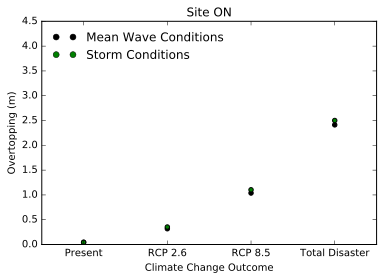

In [17]:
x1 = ["Present", "RCP 2.6", "RCP 8.5", "Total Disaster"]
x2 = ["Present", "RCP 2.6", "RCP 8.5", "Total Disaster"]

y1 = [ztop, ztop2, ztop8, ztopTD]
y2 = [ztopS, ztop2S, ztop8S, ztopTDS]

c = ["black"]*len(x1) + ["green"]*len(x2)
u, inv = np.unique(x1+x2, return_inverse=True)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(inv, y1+y2, c=c, )

f = lambda c : plt.plot([],color=c, ls="", marker="o")[0]

ax1.legend( loc='upper left',bbox_to_anchor=(0,1), handles = [f("black"), f("green")], 
           labels=['Mean Wave Conditions', 'Storm Conditions'], frameon=False)


ax1.set_xticks(range(len(u)))
ax1.set_xticklabels(u)
ax1.set_ylim(0,4.5)

ax1.set_title('Site ON')
ax1.set_xlabel('Climate Change Outcome')
ax1.set_ylabel('Overtopping (m)')

ax1.set_title = ('Wave Overtopping (m)')


plt.show()